# Analyse du spectre de diffraction infrarouge du cristal

## Téléchargement du fichier CIF symmetrized

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.analysis.diffraction.xrd import * 
from matplotlib import pyplot as plt 
from tabulate import tabulate

In [2]:
#mission 4 : téléchargement du CIF symétrique
print("Téléchargement du fichier CIF...")
structure = MPRester("H45GsyS7rpfkZzFI").get_structure_by_material_id("mp-9361")
CifWriter(structure,0.1, write_magmoms=False).write_file("RbLaS2_mp-9361_symmetrized.cif")
print("Téléchargement terminé !")

Téléchargement du fichier CIF...
Téléchargement terminé !


## Analyse du spectre infrarouge

Nous allons ici étudier le spectre de diffraction infrarouge du cristal. Ce spectre est obtenu grâce à la figure de diffraction d'un faisceau de lumière infrarouge $CuKa$ d'une longueur d'onde $\lambda = 1.54060 \mathring{A}$. Pour certains angles incidents $2\theta$, la lumière incidente interfère à cause des différents plans cristallins (spéarés d'une distance $d$). Les interférences constructives sont ajoutées sous forme de raies au spectre d'interférence.

Comme le cristal étudié a un système cristallin trigonal et une maille rhomboédrique, on peut utiliser les indices de Bravais-Miller, définis par $(h,k,-h-k,l)$. Cette notation n'a aucune implications techniques, mais permet d'appliquer des permutations circulaires d'indices pour définir des familles de plans (https://fr.wikipedia.org/wiki/Indices_de_Miller_et_indices_de_direction).

On ne considérera pas non plus la troisième raie du spectre. En effet, son intensité est beaucoup plus faible que celle des raies adjacentes, et est donc probablement due à une interférence "parasite". On considèrera donc les première, seconde et quatrième raies.

In [3]:
#mission 7
xrd = XRDCalculator(symprec=0.1)
xrdpattern = xrd.get_pattern(structure)
hkls = xrdpattern.hkls

pic n°1 :

---------------------------------------  ------------------
Angle 2θ(en °) :                         11.520375523541068
Intensité (en %):                        18.014835478970056
Indices de Bravais-Miller (h,k,-h-k,l):  (0, 0, 0, 3)
Multiplicité :                           2
Distance interplanaire :                 7.68116563760452


pic n°2 :

---------------------------------------  ------------------
Angle 2θ(en °) :                         23.159295603445447
Intensité (en %):                        19.270280458942388
Indices de Bravais-Miller (h,k,-h-k,l):  (0, 0, 0, 6)
Multiplicité :                           2
Distance interplanaire :                 3.84058281880226


pic n°4 :

---------------------------------------  ------------------
Angle 2θ(en °) :                         24.991261560328194
Intensité (en %):                        41.08418725636836
Indices de Bravais-Miller (h,k,-h-k,l):  (1, 0, -1, 2)
Multiplicité :                           12
Distance interp

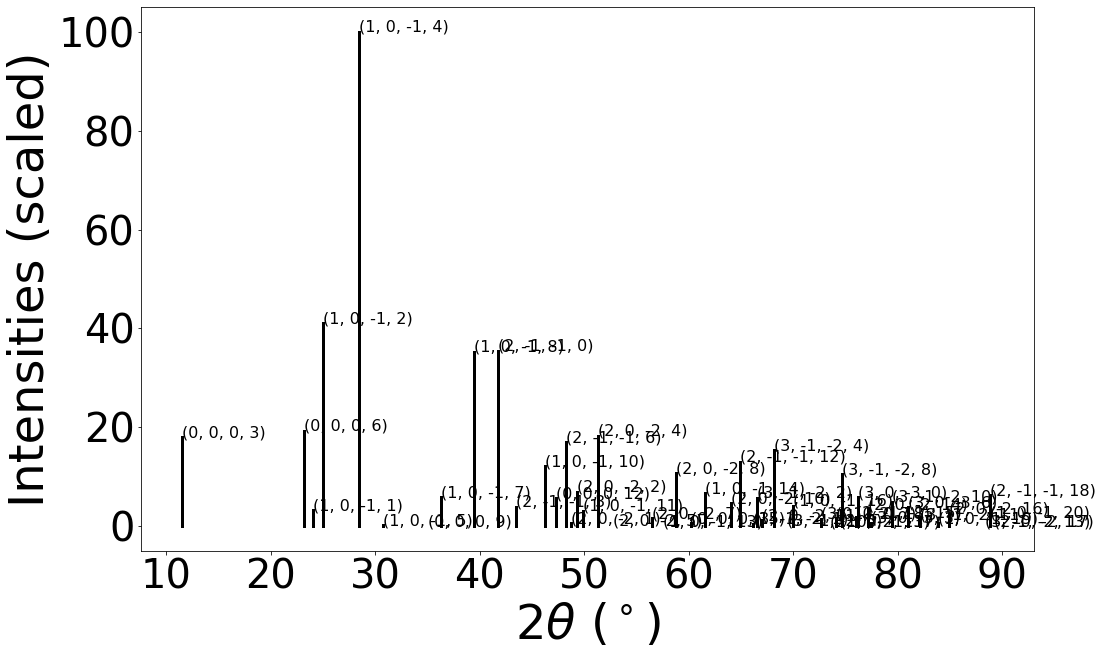

In [4]:
#affichage des résultats
for i in range(0,3):
    if i==2:
        print(tabulate([
            ["Angle 2\u03B8(en \u00b0) : ",str(xrdpattern.x[i+1])],
            ["Intensité (en \u0025): ",str(xrdpattern.y[i+1])],
            ["Indices de Bravais-Miller (h,k,-h-k,l): ",str(xrdpattern.hkls[i+1][0]['hkl'])],
            ["Multiplicité : ",str(xrdpattern.hkls[i+1][0]['multiplicity'])],
            ["Distance interplanaire : ",xrdpattern.d_hkls[i+1]]],
            headers=["pic n\u00b0"+str(i+2)+" :\n",""]))
        print("\n")    
    else :
        print(tabulate([
            ["Angle 2\u03B8(en \u00b0) : ",str(xrdpattern.x[i])],
            ["Intensité (en \u0025): ",str(xrdpattern.y[i])],
            ["Indices de Bravais-Miller (h,k,-h-k,l): ",str(xrdpattern.hkls[i][0]['hkl'])],
            ["Multiplicité : ",str(xrdpattern.hkls[i][0]['multiplicity'])],
            ["Distance interplanaire : ",xrdpattern.d_hkls[i]]],
            headers=["pic n\u00b0"+str(i+1)+" :\n",""]))
        print("\n")
xrd.show_plot(structure)

Plus en détail, on a :  

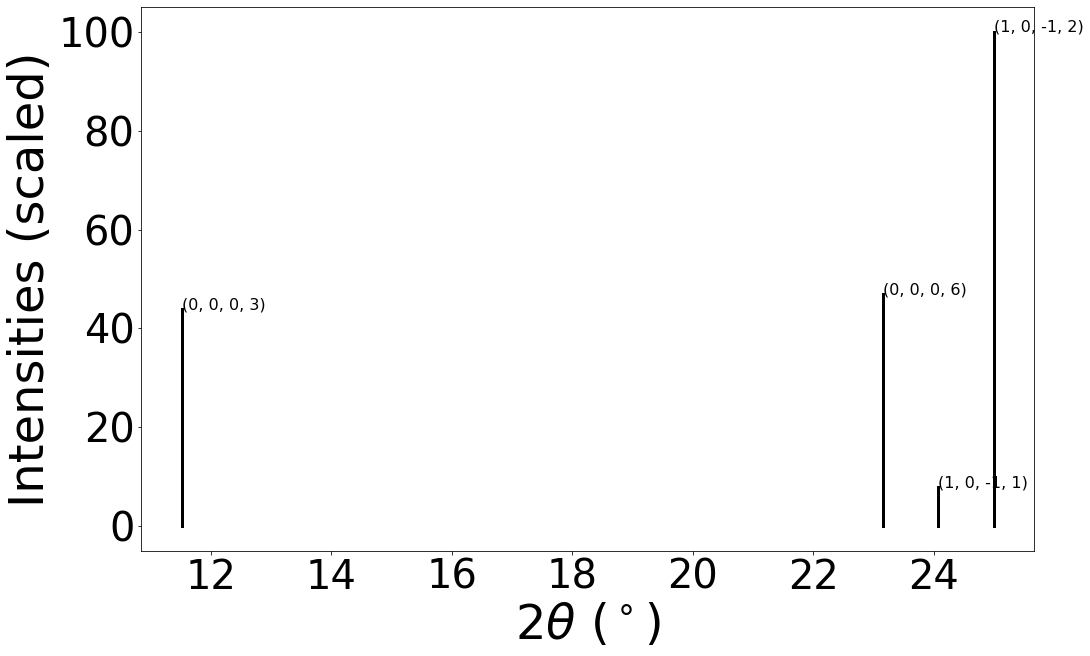

In [5]:
xrd.show_plot(structure,two_theta_range=[0,28])